# Fintech & DSS Hackathon - Tutorial Document

This document will outline a very basic tutorial on how to use kaggle to get stock data and forecast the future stock predictions using Linear Regression

You can either run this notebook on your local machine or on Google Colab. If you are running this on your local machine, you will need to install the required libraries. If you are running this on Google Colab, you can directly run the cells.

## 1: Importing the necessary libraries

### For Google Colab Users

Run the cell below:

In [3]:
# ignore this if you already have the libraries downloaded

# For Google Colab users, you can run this cell to install the required libraries
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### For Local Machine Users

You should create a virtual environment and install the necessary libraries. You may use your favourite tool (venv, conda, etc.) to create the virtual environment.

I will be using venv to create the virtual environment. Run the following commands in your terminal:

```bash
python3 -m venv tutorial-env
source tutorial-env/bin/activate
pip install -r requirements.txt
```

### For Both Google Colab and Local Machine Users

In [4]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [5]:
%matplotlib inline

## 2. Data Collection and Exploration

### If google colab
make sure to upload the tutorial data file to the colab environment

In [6]:
df = pd.read_csv('tutorial.csv')

In [7]:
# Display the first 5 rows of the dataset
df.head()

,ID,Open,High,Low,Close,Volume,Dividends,Stock Splits,Date
0,0,0.040125,0.044783,0.035587,0.037618,2714688000,0.0,0.0,1999-01-22 00:00:00-05:00
1,1,0.040603,0.042036,0.037618,0.041559,510480000,0.0,0.0,1999-01-25 00:00:00-05:00
2,2,0.042036,0.042872,0.037737,0.038334,343200000,0.0,0.0,1999-01-26 00:00:00-05:00
3,3,0.038453,0.039409,0.036303,0.038215,244368000,0.0,0.0,1999-01-27 00:00:00-05:00
4,4,0.038215,0.038453,0.037856,0.038095,227520000,0.0,0.0,1999-01-28 00:00:00-05:00


Very basic explanation of the history data:

- Open: The price at the beginning of the trading day.
- High: The highest price reached during the day.
- Low: The lowest price reached during the day.
- Close: The price at the end of the trading day.
- Volume: The number of shares traded.
- Dividends: The dividend yield (annual dividend per share divided by the stock price) and the dividend payout ratio.
- Stock Splits: A history of stock splits, including the date and ratio.

In [8]:
# Check the shape of the dataset
x = df.index
y = df['Close']
y

0         0.037618
1         0.041559
2         0.038334
3         0.038215
4         0.038095
           ...    
6478    143.710007
6479    143.589996
6480    139.559998
6481    140.410004
6482    143.460007
Name: Close, Length: 6483, dtype: float64

In [9]:
# define function to plot the data
def df_plot(x, y, title="", xlabel="Index", ylabel="", dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y, color='tab:blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

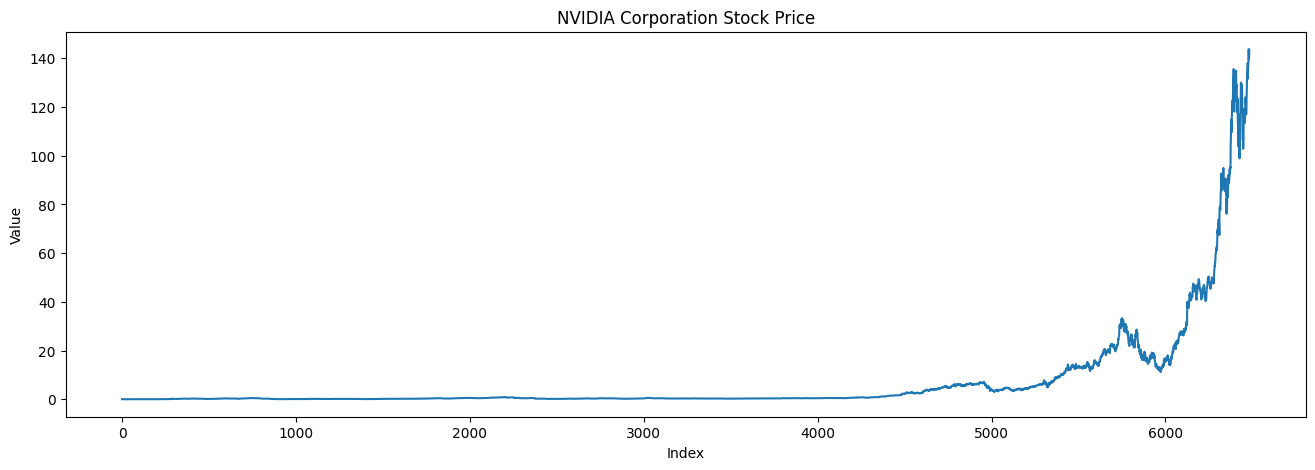

In [10]:
title = f"NVIDIA Corporation Stock Price"

df_plot(x, y, title=title, ylabel="Value")

In [11]:
# We declare the Dividends and Stock Splits unnecessary for our analysis and drop them

df.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True) 
df.head()

,ID,Open,High,Low,Close,Volume,Date
0,0,0.040125,0.044783,0.035587,0.037618,2714688000,1999-01-22 00:00:00-05:00
1,1,0.040603,0.042036,0.037618,0.041559,510480000,1999-01-25 00:00:00-05:00
2,2,0.042036,0.042872,0.037737,0.038334,343200000,1999-01-26 00:00:00-05:00
3,3,0.038453,0.039409,0.036303,0.038215,244368000,1999-01-27 00:00:00-05:00
4,4,0.038215,0.038453,0.037856,0.038095,227520000,1999-01-28 00:00:00-05:00


In [12]:
# df.info() gives us the information about the data types of the columns and the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483 entries, 0 to 6482
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      6483 non-null   int64  
 1   Open    6483 non-null   float64
 2   High    6483 non-null   float64
 3   Low     6483 non-null   float64
 4   Close   6483 non-null   float64
 5   Volume  6483 non-null   int64  
 6   Date    6483 non-null   object 
dtypes: float64(4), int64(2), object(1)
memory usage: 354.7+ KB


In [13]:
# We can see that the Date column is an object data type. We need to convert it to a datetime data type
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6483 entries, 0 to 6482
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   ID      6483 non-null   int64              
 1   Open    6483 non-null   float64            
 2   High    6483 non-null   float64            
 3   Low     6483 non-null   float64            
 4   Close   6483 non-null   float64            
 5   Volume  6483 non-null   int64              
 6   Date    6483 non-null   datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), float64(4), int64(2)
memory usage: 354.7 KB


In [14]:
df['Date'].head()

0   1999-01-22 05:00:00+00:00
1   1999-01-25 05:00:00+00:00
2   1999-01-26 05:00:00+00:00
3   1999-01-27 05:00:00+00:00
4   1999-01-28 05:00:00+00:00
Name: Date, dtype: datetime64[ns, UTC]

In [15]:
# find any null values in the dataset
# if there are any, we will need to do some data cleaning
df.isnull().sum()

ID        0
Open      0
High      0
Low       0
Close     0
Volume    0
Date      0
dtype: int64

In [16]:
# df.describe() gives us the statistical summary of the dataframe
df.describe()

,ID,Open,High,Low,Close,Volume
count,6483.00000,6483.000000,6483.000000,6483.000000,6483.000000,6.483000e+03
mean,3241.00000,7.281078,7.417385,7.134901,7.283510,6.032985e+08
std,1871.62523,19.612247,19.982831,19.195359,19.610989,4.312965e+08
min,0.00000,0.032005,0.032602,0.030571,0.031289,1.968000e+07
25%,1620.50000,0.255884,0.263222,0.249044,0.255808,3.429750e+08
50%,3241.00000,0.432293,0.439620,0.424733,0.432589,5.042310e+08
75%,4861.50000,4.338335,4.408710,4.268569,4.330174,7.347220e+08
max,6482.00000,142.910004,144.419998,141.779999,143.710007,9.230856e+09


## 3. Data Preprocessing

We now define the features and the target variable. 

Features are the columns that we will use to predict the target variable. In this case, we will use the 'Close' column as the target variable. We will use the 'Open', 'High', 'Low', and 'Volume' columns as the features.

Or in other words, we will use the opening price, highest price, lowest price, and the volume of the stock as the features to predict the closing price of the stock.

In [17]:
# obtain the columns needed for the analysis
x = df[['Open', 'High', 'Low', 'Volume']]
y = df['Close']

We need to split the data into two segments: training data and testing data. We will use the training data to train the model and the testing data to evaluate the model.

The training data helps the machine learn patterns and relationships in the data. Whereas the testing data evaluates how well the machine has learned and how it performs on new unseen data.

In [18]:
# split the data into training and testing sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=False, random_state=0)

In [19]:
print(f"{x_train.shape=}")
print(f"{x_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

x_train.shape=(5186, 4)
x_test.shape=(1297, 4)
y_train.shape=(5186,)
y_test.shape=(1297,)


In [23]:
y_test

5186      4.084383
5187      4.198579
5188      4.471750
5189      4.444632
5190      4.490656
           ...    
6478    143.710007
6479    143.589996
6480    139.559998
6481    140.410004
6482    143.460007
Name: Close, Length: 1297, dtype: float64

We will use Linear Regression to predict the closing price of the stock.

Linear Regression is a statistical method which used to model the relationship between a dependent variable (target) and one or more independent variables (features).
It assumes that the relationship is linear, meaning it can be represented by a straight line. 

In simple terms, it tries to find the best line that fits the data points.

For our case, the equation of the line will be:

$$y = m1 * x1 + m2 * x2 + m3 * x3 + m4 * x4 + b$$

where:
- y is the target variable (closing price)
- x1, x2, x3, x4 are the features (open, high, low, volume)
- m1, m2, m3, m4 are the coefficients of the features
- b is the intercept

The model tries to find the best values for the coefficients and the intercept that minimizes the error between the predicted values and the actual values.

## 4. Model Training and Evaluation

In [20]:
from sklearn.linear_model import LinearRegression

# create a Linear Regression model
model = LinearRegression()

# fit the model to the training data (i.e. train the model)
model.fit(x_train, y_train)

# show the model's intercept and coefficients
print(f"{model.intercept_=}")
print(f"{model.coef_=}")

model.intercept_=-0.00021390892477624046
model.coef_=array([-6.44862676e-01,  8.43456134e-01,  8.01746839e-01, -2.66453526e-15])


In [21]:
# show a table comparing the actual values to the predicted values

y_pred = model.predict(x_test)
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfr.head()

,Actual,Predicted
5186,4.084383,4.097142
5187,4.198579,4.197697
5188,4.471750,4.450091
5189,4.444632,4.464206
5190,4.490656,4.561457


In [22]:
dfr.describe()

,Actual,Predicted
count,1297.000000,1297.000000
mean,32.770970,32.758982
std,33.194090,33.165283
min,4.084383,4.097142
25%,13.022847,13.042882
50%,19.257538,19.283487
75%,42.226227,42.392921
max,143.710007,143.326057


To evaluate the model, we will use the Mean Absolute Error (MAE) metrics. It is the average of the absolute differences between the predicted values and the actual values. It provides a simple, intuitive way to assess how far off teh model's predictions are from the actual values.

Formula:

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y_{i}}|$$

where:
- n is the number of data points
- y_{i} is the actual value
- \hat{y_{i}} is the predicted value

Interpretation:

- Lower MAE: Indicates that the model's predictions are closer to the actual values, which is generally better
- Higher MAE: Indicates that the model's predictions are further from the actual values, which is generally worse

The MAE metric is easy to understand and robust to outliers, but it does not penalize large errors as much as other metrics like Mean Squared Error (MSE).

Usually, we will use a combination of metrics to evaluate the model, but for this tutorial and hackathon, we will stick with MAE.

In [24]:
# calculate the Mean Absolute Error  

mae = metrics.mean_absolute_error(y_test, y_pred)
print(f"{mae=}")

mae=0.28598753743944216


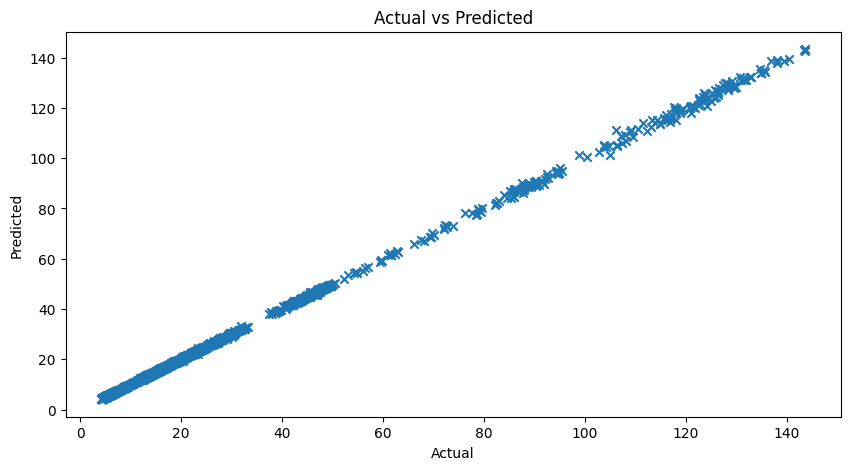

In [25]:
def scatter_plot(y_test, y_pred, title, xlabel, ylabel, dpi=100):
    plt.figure(figsize=(10, 5), dpi=dpi)
    plt.scatter(y_test, y_pred, color='tab:blue', marker='x')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

scatter_plot(y_test, y_pred, title="Actual vs Predicted", xlabel="Actual", ylabel="Predicted")

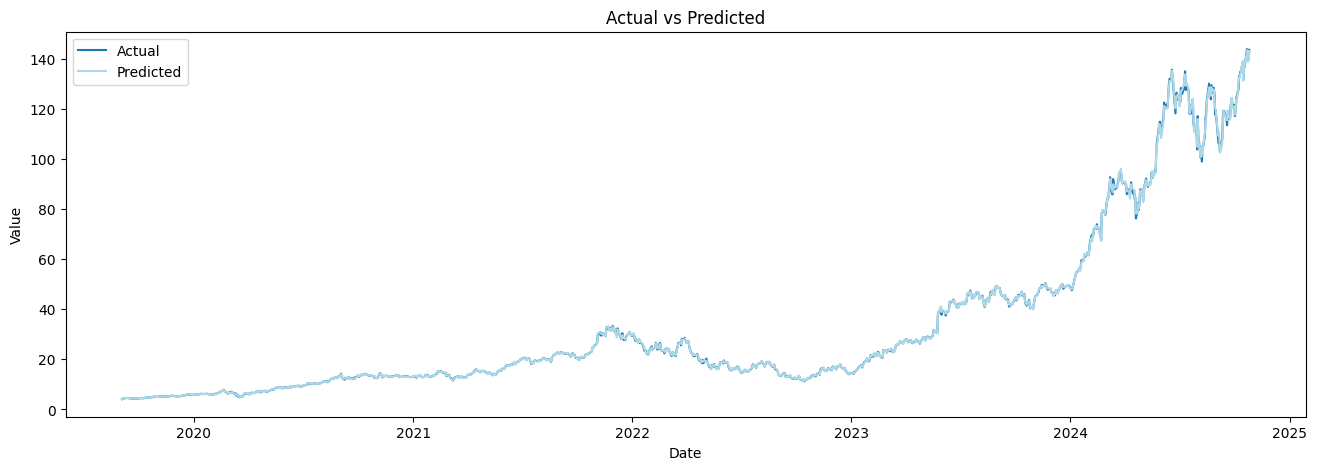

In [26]:
# get the dates for the test data
dates = df['Date'].iloc[y_test.index]

# create a dataframe for the actual and predicted values
dfp = pd.DataFrame({'Date': dates, 'Actual': y_test, 'Predicted': y_pred})

# plot the actual and predicted values as line graphs
def dfp_plot(x, y1, y2, title="", xlabel="Date", ylabel="Value", dpi=100):
    plt.figure(figsize=(16, 5), dpi=dpi)
    plt.plot(x, y1, color='tab:blue', label='Actual')
    plt.plot(x, y2, color='lightblue', label='Predicted')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.legend()
    plt.show()

dfp_plot(dfp['Date'], dfp['Actual'], dfp['Predicted'], title="Actual vs Predicted", ylabel="Value")

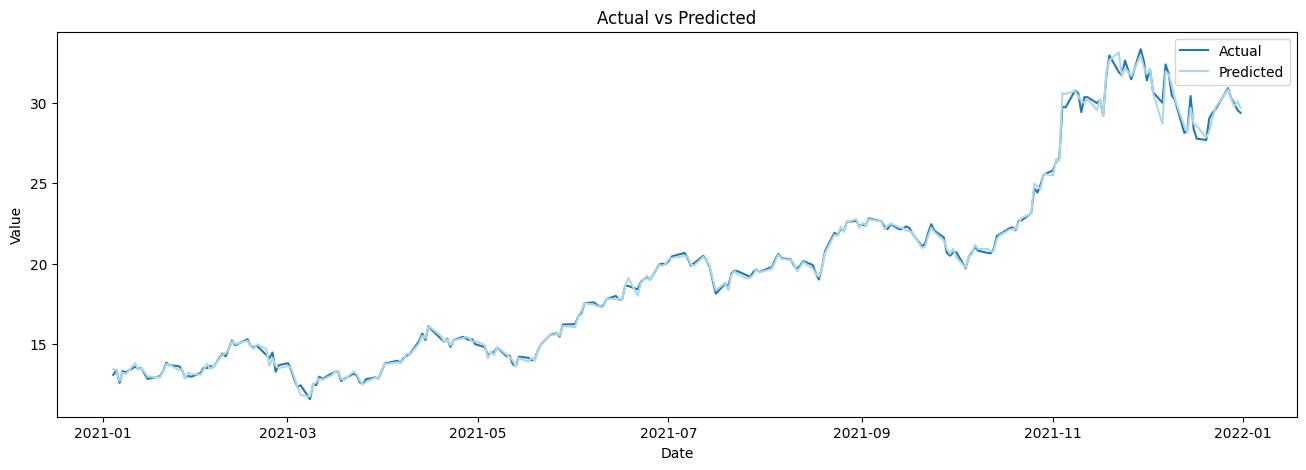

In [27]:
# it's hard to see the difference between the actual and predicted values so trim the date to a smaller range
dfp_trim = dfp[(dfp['Date'] > '2021-01-01') & (dfp['Date'] < '2022-01-01')]
dfp_plot(dfp_trim['Date'], dfp_trim['Actual'], dfp_trim['Predicted'], title="Actual vs Predicted", ylabel="Value")

## 5. Suggested improvements

### Data Preprocessing

Was the data preprocessed correctly? Imbalance of data scale can affect the model's performance. For example, if one feature is in the range of 0-1 and another feature is in the range of 1000-10000, the model might not perform well. You can use techniques like normalization or standardization to scale the data.

We didn't use Date as a feature here. Why didn't we use it? Can we use it? If so, how can we use it?

### Model Type

Linear Regression is a simple model. You can try other models like LSTM, ARIMA, SVR, GBM, etc. to see if they perform better.
What about ensemble methods like Random Forest, Gradient Boosting, etc.?

It might be interesting to try different models and see which one performs better.

### Model Hyperparameters

You can search up what this means, but in simple terms, hyperparameters are the parameters that are set before the learning process begins.
You can tune the hyperparameters of the model to see if the model performs better. For example, you can change the learning rate, the number of iterations, the regularization parameter, etc.

### Model Evaluation

MAE is not the only metric you can use to evaluate the model. There are many more metrics to evaluate a regression model.

### Feature Engineering

You can create new features from the existing features to improve the model's performance. For example, you can create moving averages, exponential moving averages, etc.
It might be helpful to do some research on the stock market and see what features are important in predicting the stock price.

# 6. A few Exercises


1. Try implementing the MAE metric from scratch, only using numpy. Compare the results with the sklearn implementation.

2. Search up how to use the Date column as a feature. Implement it and see if it improves the model's performance.

3. Search up what an SMA (Simple Moving Average) is. Implement it as a feature and see if it improves the model's performance.

4. Search up what a Random Forest model is. How can you implement it in this case? Does it perform better than Linear Regression?